In [13]:
# Menghubungkan Google Colab & Drive

from google.colab import drive
drive.mount('/content/gdrive')

path = "/content/gdrive/MyDrive/Datamining/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:
import pandas as pd
df = pd.read_csv(path + 'Data_Transportasi.csv',sep = ',')
df.rename(columns ={'Biaya Transportasi Harian (Rp)':'Biaya'}, inplace=True)
df.rename(columns ={'Harga Bahan Bakar (Rp/Liter)':'Harga'}, inplace=True)
df.rename(columns ={'Jarak Perjalanan (km)':'Jarak'}, inplace=True)
df.head(5)

,Biaya,Jarak,Jenis Kendaraan,Harga
0,53355.0,22,Mobil,13550
1,29040.0,11,Angkot,13400
2,29500.0,27,Motor,10000
3,34355.0,3,Mobil,13550
4,24500.0,17,Motor,10000


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

x = df[["Jarak", "Harga"]].to_numpy()
y = df["Biaya"].to_numpy()

x = sm.add_constant(x)
model_prediksi = sm.OLS(y, x).fit();
print(model_prediksi.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     16.55
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           6.52e-07
Time:                        11:27:47   Log-Likelihood:                -1172.9
No. Observations:                 100   AIC:                             2352.
Df Residuals:                      97   BIC:                             2360.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.703e+04   3.21e+04     -3.022      0.0

In [22]:
import pandas as pd
df1 = pd.read_csv('/content/gdrive/MyDrive/Datamining/Datates_Transportasi.csv',sep = ',')
x_tes = df1[["Jarak ","Harga "]].to_numpy()
y_real = df1["Biaya "].to_numpy()
y_nama = df1["Jenis Kendaraan"].to_numpy()
x_tes = sm.add_constant(x_tes)
y_pred = model_prediksi.predict(x_tes)

In [27]:
df = pd.DataFrame()
df["Jenis Kendaraan"]=y_nama
df["Biaya Real"]=y_real
df["Biaya Prediksi"]=y_pred
df["ERROR"]=df["Biaya Real"]-df["Biaya Prediksi"]
df["PERSEN PREDIKSI"]=1.0-(abs(df["ERROR"])/df["Biaya Real"])
df["PERSEN"]=df["PERSEN PREDIKSI"]*100
display(df.head(5))

,Jenis Kendaraan,Biaya Real,Biaya Prediksi,ERROR,PERSEN PREDIKSI,PERSEN
0,Mobil,53355,73815.100531,-20460.100531,0.616529,61.652890
1,Angkot,29040,62643.399354,-33603.399354,-0.157142,-15.714185
2,Motor,29500,38342.842215,-8842.842215,0.700243,70.024264
3,Truk,143880,82656.413090,61223.586910,0.574482,57.448160
4,Angkot,47240,85075.716219,-37835.716219,0.199075,19.907459


In [31]:
df.to_csv('Datates_Transportasi.csv')
datasets = pd.read_csv('Datates_Transportasi.csv',sep = ',')
datasets.head(10)

,Unnamed: 0,Jenis Kendaraan,Biaya Real,Biaya Prediksi,ERROR,PERSEN PREDIKSI,PERSEN
0,0,Mobil,53355,73815.100531,-20460.100531,0.616529,61.652890
1,1,Angkot,29040,62643.399354,-33603.399354,-0.157142,-15.714185
2,2,Motor,29500,38342.842215,-8842.842215,0.700243,70.024264
3,3,Truk,143880,82656.413090,61223.586910,0.574482,57.448160
4,4,Angkot,47240,85075.716219,-37835.716219,0.199075,19.907459
5,5,Mobil,51355,72089.537696,-20734.537696,0.596251,59.625085
6,6,Motor,28500,36617.279379,-8117.279379,0.715183,71.518318
7,7,Bus,99210,59289.976089,39920.023911,0.597621,59.762097
8,8,Truk,101380,67989.128987,33390.871013,0.670637,67.063651
9,9,Bus,87210,54113.287581,33096.712419,0.620494,62.049407


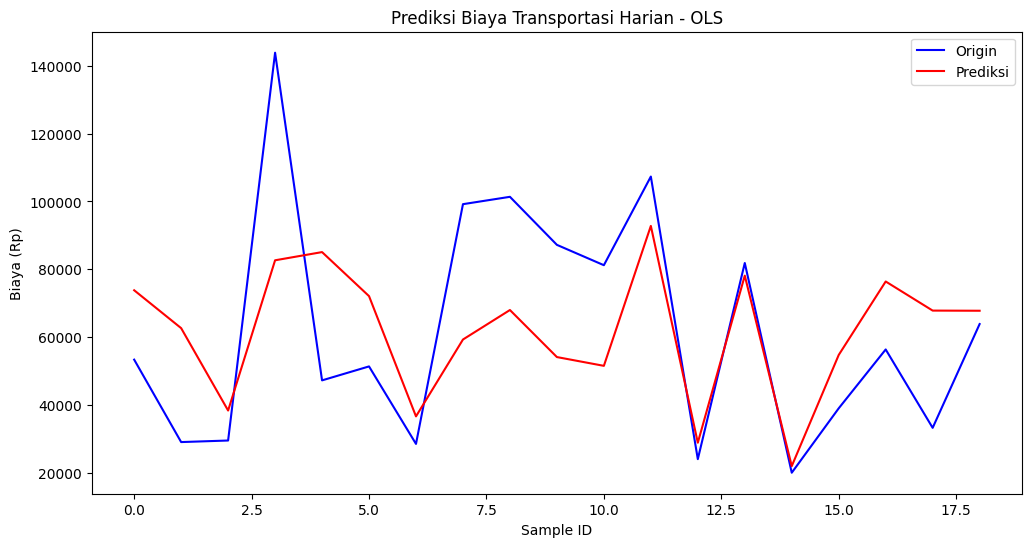

In [25]:
plt.figure(figsize=(12,6))
x = datasets.iloc[:, 0].values
plt.plot(x, datasets["Biaya Real"], label = "Origin", color= "b")
plt.plot(x, datasets["Biaya Prediksi"], label = "Prediksi", color= "r")

plt.legend()
plt.xlabel('Sample ID')
plt.ylabel('Biaya (Rp)')
plt.title('Prediksi Biaya Transportasi Harian - OLS')
plt.show()